In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pathlib
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.layers import Flatten,Dense,Dropout,MaxPool2D,Conv2D

In [2]:
test_df = pd.read_csv('C:/Users/hp/Downloads/German Traffic Sign Dataset/Test.csv')

In [3]:
df_train = pd.read_csv("C:/Users/hp/Downloads/German Traffic Sign Dataset/Train.csv")
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [4]:
!pip install visualkeras

In [5]:
import visualkeras
import pandas as pd
df=pd.read_csv('C:/Users/hp/Downloads/German Traffic Sign Dataset/Train.csv',
               usecols=['ClassId','Path','Width','Height']).rename(columns={"ClassId": "label",
                                                                            "Path": "path"})

test=pd.read_csv('C:/Users/hp/Downloads/German Traffic Sign Dataset/Test.csv',usecols=['ClassId','Path']).rename(columns={"ClassId": "label"})

print("----------TRAIN DATA---------")
print(df.head())
print('\n-----------No. of Classes-----------')
print(df.label.nunique())
print("----------TEST DATA---------")
print(test.head())

print('\n-----------No. of Classes-----------')

print(test.label.nunique())


----------TRAIN DATA---------
   Width  Height  label                            path
0     27      26     20  Train/20/00020_00000_00000.png
1     28      27     20  Train/20/00020_00000_00001.png
2     29      26     20  Train/20/00020_00000_00002.png
3     28      27     20  Train/20/00020_00000_00003.png
4     28      26     20  Train/20/00020_00000_00004.png

-----------No. of Classes-----------
43
----------TEST DATA---------
   label            Path
0     16  Test/00000.png
1      1  Test/00001.png
2     38  Test/00002.png
3     33  Test/00003.png
4     11  Test/00004.png

-----------No. of Classes-----------
43


In [6]:
# Training path for images to grab
train_img_path='C:/Users/hp/Downloads/German Traffic Sign Dataset/Train'
# Define Std batch size of 32
batch_size = 32

# As images size vary from 26 X 26 to 173 X 173, use std img size
img_height = 30
img_width = 30




In [7]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [8]:
data_dir = 'C:/Users/hp/Downloads/German Traffic Sign Dataset'
train_path = 'C:/Users/hp/Downloads/German Traffic Sign Dataset/Train'
test_path = 'C:/Users/hp/Downloads/German Traffic Sign Dataset/'
IMG_HEIGHT = 30
IMG_WIDTH = 30

In [9]:
# Number of Classes
import os
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

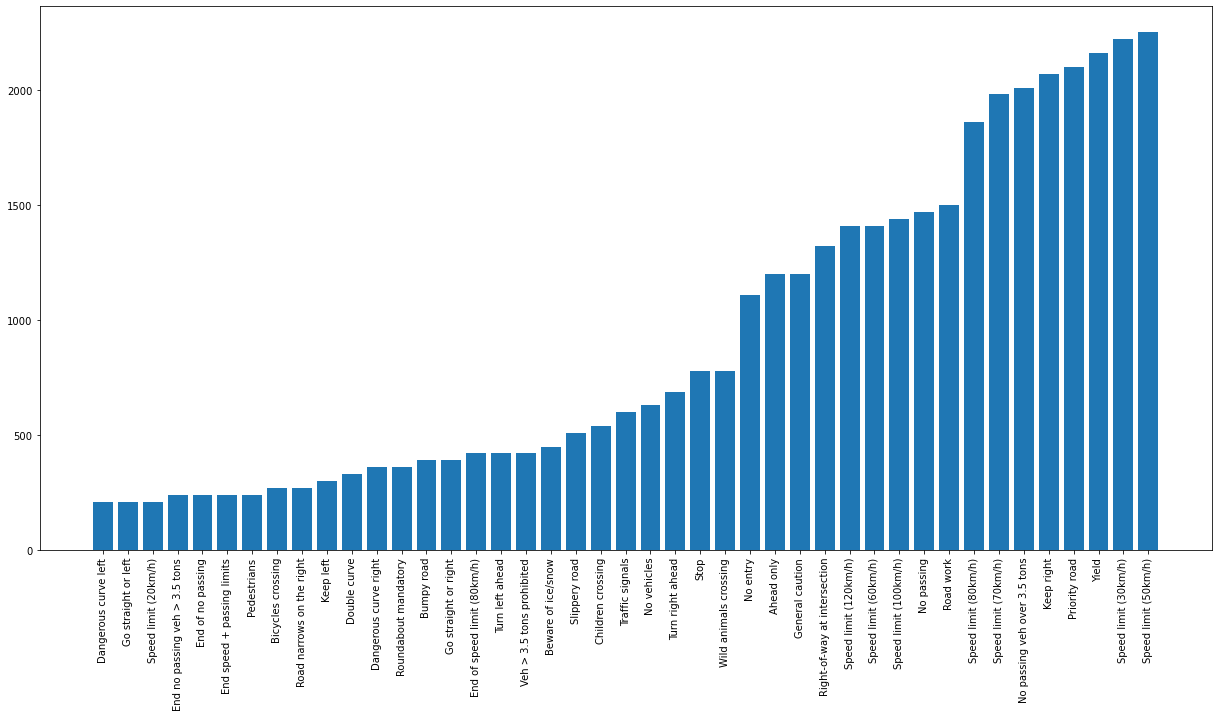

In [10]:
import os
import matplotlib.pyplot as plt
folders = os.listdir(train_img_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_img_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()


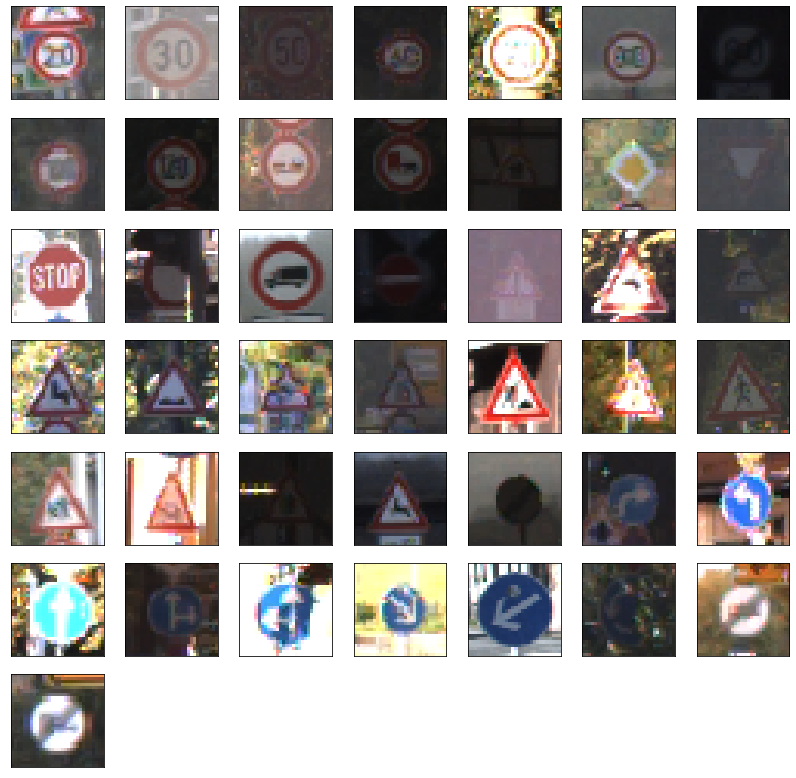

In [11]:
# Visualizing all the different Signs
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()

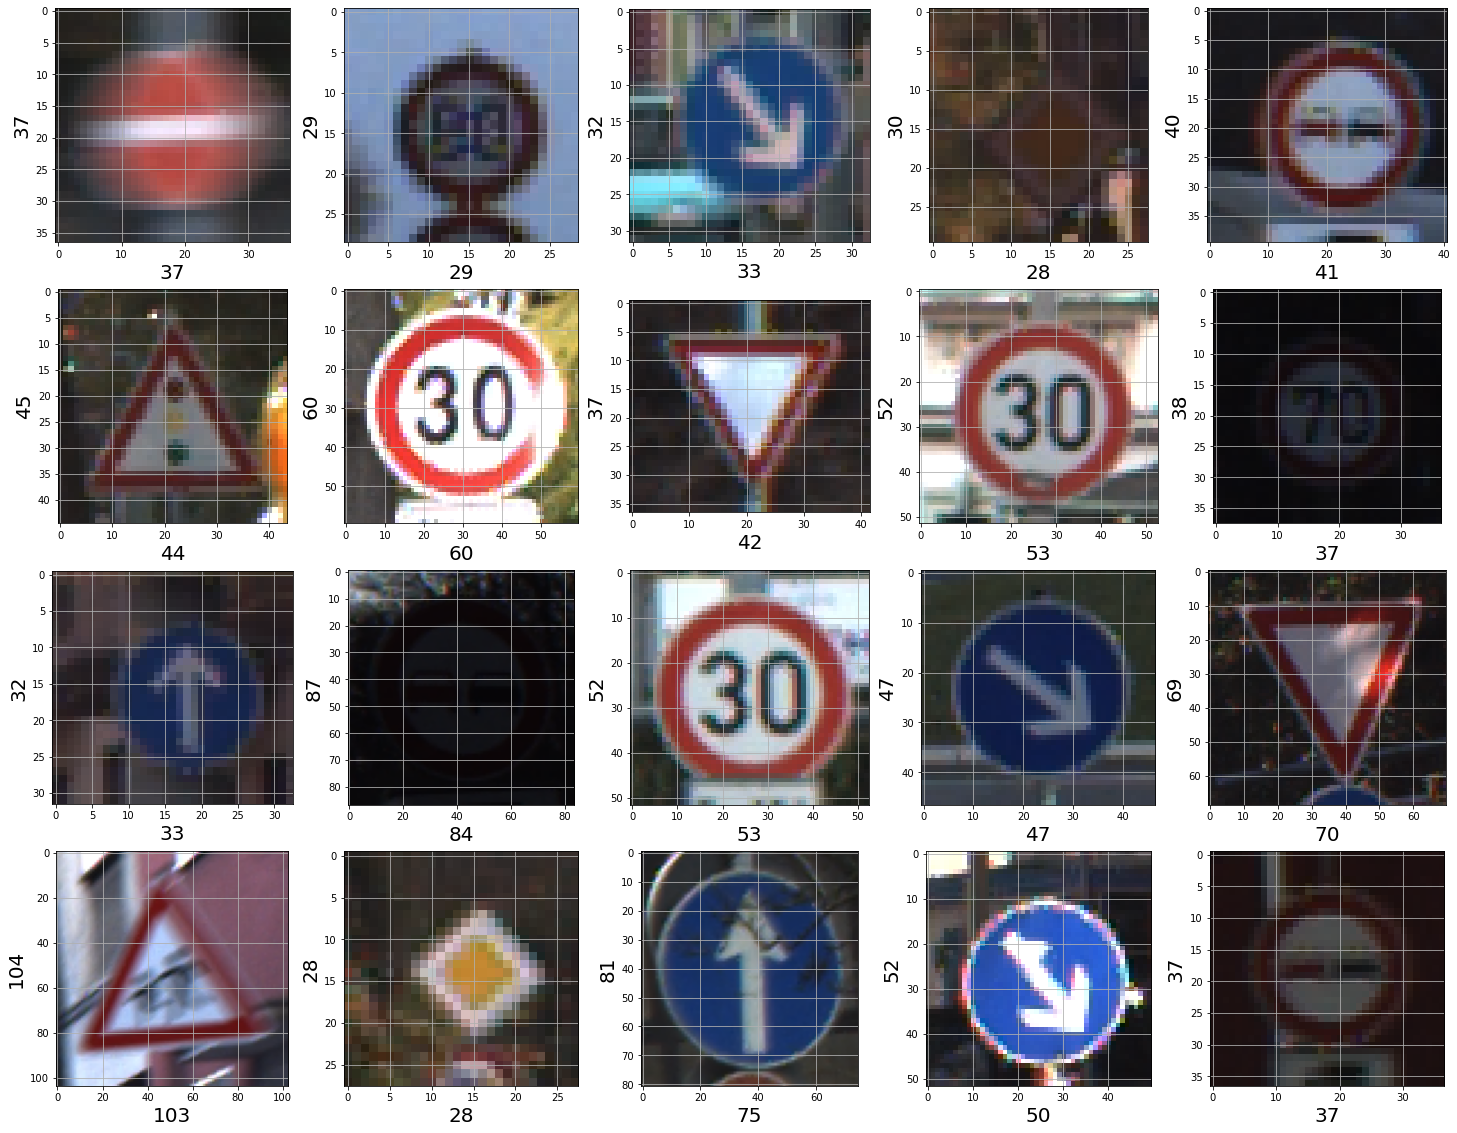

In [12]:
# Visualizing 25 random images from test data
input_path = "C:/Users/hp/Downloads/German Traffic Sign Dataset/"
data_dir = input_path
import random
from matplotlib.image import imread

# test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values #test folder path

plt.figure(figsize=(25,25))

for i in range(1,21):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [13]:
def load_data(data_dir):
    '''
    Loading data from Train folder.
    
    Returns a tuple `(images, labels)` , where `images` is a list of all the images in the train directory,
    where each image is formatted as a numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. 
    `labels` is a list of integer labels, representing the categories for each of the
    corresponding `images`.
    '''
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels
        

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
images, labels = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(labels)

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(23525, 30, 30, 3) (15684, 30, 30, 3) (23525, 43) (15684, 43)


In [15]:
# Importing all essential lib
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
import tensorflow.keras.layers as layers
import tensorflow.keras.layers.experimental.preprocessing as preprocessing
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [16]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [17]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Fitting the model
EPOCHS = 30
history = model.fit(x_train,y_train,validation_data = (x_test, y_test), epochs=EPOCHS,batch_size=32, steps_per_epoch=60)

Epoch 1/30
60/60 [==============================] - 37s 349ms/step - loss: 15.4622 - accuracy: 0.0329 - val_loss: 3.7430 - val_accuracy: 0.0486
Epoch 2/30
60/60 [==============================] - 5s 85ms/step - loss: 3.7381 - accuracy: 0.0591 - val_loss: 3.7186 - val_accuracy: 0.0486
Epoch 3/30
60/60 [==============================] - 5s 86ms/step - loss: 3.7290 - accuracy: 0.0593 - val_loss: 3.7031 - val_accuracy: 0.0591
Epoch 4/30
60/60 [==============================] - 7s 111ms/step - loss: 3.6978 - accuracy: 0.0602 - val_loss: 3.6846 - val_accuracy: 0.0590
Epoch 5/30
60/60 [==============================] - 5s 92ms/step - loss: 3.6743 - accuracy: 0.0600 - val_loss: 3.6616 - val_accuracy: 0.0599
Epoch 6/30
60/60 [==============================] - 6s 106ms/step - loss: 3.6550 - accuracy: 0.0544 - val_loss: 3.6521 - val_accuracy: 0.0557s: 3.6540 - accuracy
Epoch 7/30
60/60 [==============================] - 5s 92ms/step - loss: 3.6465 - accuracy: 0.0630 - val_loss: 3.6378 - val_accur

In [19]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

491/491 [==============================] - 4s 9ms/step - loss: 3.5069 - accuracy: 0.0530
test set accuracy:  5.304769054055214


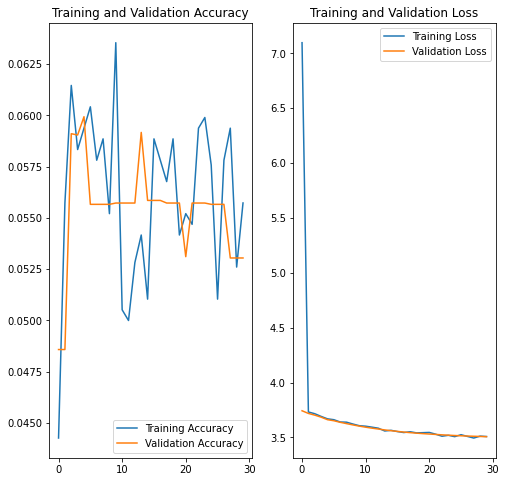

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [21]:
from sklearn.metrics import accuracy_score
import pandas as pd

Y_test = pd.read_csv(test_path + 'Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
model.save("C:/Users/hp/Downloads/German Traffic Sign Dataset/training/TSR.h5")

In [ ]:
from keras.models import load_model
model = load_model('C:/Users/hp/Downloads/German Traffic Sign Dataset/training/TSR.h5')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

In [ ]:
plot,prediction = test_on_img(r'C:\Users\hp\Downloads\German Traffic Sign Dataset\Test\00024.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()